# Regularization vs Normalization

Regularization과 Normalization 모두 한국어로 변역할 때 '정규화'로 번역 될 때가 많아서 혼란스러울 때가 있다. 
   
- Regularization : 정칙화라고 불리며, overfitting을 해결하기 위한 방법 중 하나이다. L1, L2 regularization, Dropout, Batch normalization 등이 있다.   
   
   
- Normalization : 정규화라고 불리며, 데이터의 형태를 점 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정이다. Mnist에서 train = train / 255.0을 했던 것을 기억하자.

In [4]:
# iris 데이터를 이용한 regularization, normalization 간단한 예제

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
target_df = pd.DataFrame(data = iris.target, columns = ['species'])

#0,1,2로 되어있는 target 데이터를 'setosa', 'versicolor', 'verginica'로 바꾼다.
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'verginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# verginica의 petal length를 x, sepal length를 y로 두고 print
X = [iris_df['petal length (cm)'][i] for i in iris_df.index if iris_df['species'][i] == 'verginica']
Y = [iris_df['sepal length (cm)'][i] for i in iris_df.index if iris_df['species'][i] == 'verginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


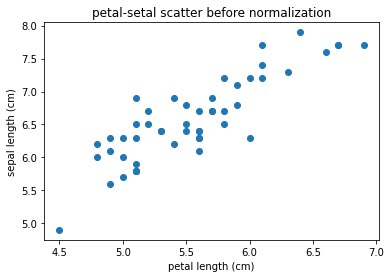

In [6]:
# 직관적으로 잘 와닿지 않으므로 산점도로 표현
plt.scatter(X,Y)
plt.title('petal-setal scatter before normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

### (1) minmax_scale normalization 을 이용해서 산점도 표현

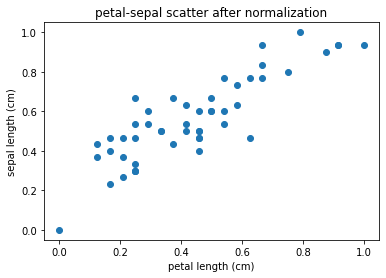

In [8]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.scatter(X_scale, Y_scale)
plt.title('petal-sepal scatter after normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

In [10]:
# 간단한 회귀문제로 Regularization 에 대해 알아보자

from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

linear_regression = LinearRegression()
linear_regression.fit(X.reshape(-1,1), Y)

# linear regression의 기울기와 절편 확인
a, b = linear_regression.coef_, linear_regression.intercept_
print('기울기 : %0.2f, 절편 : %0.2f' %(a,b))

기울기 : 1.00, 절편 : 1.06


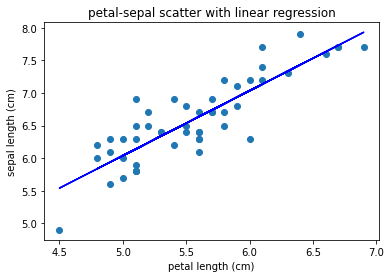

In [11]:
# 이 직선과 산점도를 같이 표현

plt.scatter(X,Y)
plt.plot(X, linear_regression.predict(X.reshape(-1,1)), '-b')
plt.title('petal-sepal scatter with linear regression')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

### (2) L1, L2 regulariztion (각 Lasso, Ridge)

기울기 : 0.00, 절편 : 6.59


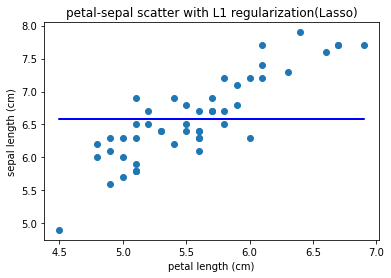

In [12]:
#L1 regularization (Lasso)
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.scatter(X,Y)
plt.plot(X, L1.predict(X.reshape(-1,1)), '-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

- 제대로 풀지 못하는 것 같다.

기울기 : 0.93, 절편 : 1.41


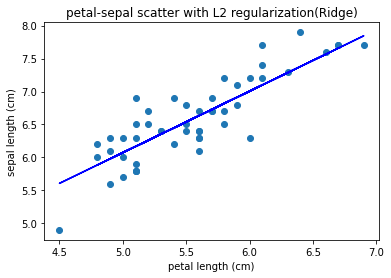

In [14]:
# L2 regularization (Ridge)
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a,b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.scatter(X,Y)
plt.plot(X, L2.predict(X.reshape(-1,1)), '-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

## Lp norm

- Vector norm
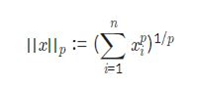

In [15]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


- p가 infinity norm일 경우에는 가장 큰 숫자를 출력한다.

In [16]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


- matrix norm

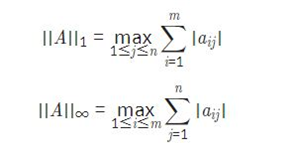

- matrix norm의 경우는 p = 1, infinity인 경우만 알면 된다. p=1인 경우에는 칼럼의 합이 가장 큰 값이 출력, p=infinity인 경우에는 로우의 합이 가장 큰 값이 출력된다.

In [17]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# Dropout

- Overfitting을 막는 regularization layer 중 하나이다. 이름 그대로 값들을 모든 뉴런에 전달하는 것이 아닌 확률적으로 버리면서 전달하는 기법.

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [22]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser' 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

train_images = train_images/255.0
test_images = test_images/255.0

In [23]:
#dropout을 가지고 실습
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6379 - accuracy: 0.3805
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2022 - accuracy: 0.5125
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1326 - accuracy: 0.5362
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1062 - accuracy: 0.5481
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0916 - accuracy: 0.5518


In [24]:
#dropout 없이 실습
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6280 - accuracy: 0.7843
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8604
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8919


- 현재 이 데이터셋은 학습이 잘 되는 데이터셋으로, Fully Connected Layer에서도 결과가 잘 나온다. 일부러 dropout layer를 추가하여 학습이 안 되는 것을 확인할 수 있었다. 그럼 overfitting 이 나는 환경에서 dropout의 중요성을 확인해보자

In [25]:
# 위의 데이터를 train:valid = 99:1 로 split을 하여 loss function의 값으 그려보고, overfitting이 나는 fully connected layer를 만들자.

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 7ms/step - loss: 2.1977 - accuracy: 0.4248 - val_loss: 1.6299 - val_accuracy: 0.6183
Epoch 2/200
117/117 [==============================] - 1s 4ms/step - loss: 1.5020 - accuracy: 0.6025 - val_loss: 1.1560 - val_accuracy: 0.6833
Epoch 3/200
117/117 [==============================] - 1s 4ms/step - loss: 1.1104 - accuracy: 0.6716 - val_loss: 0.9356 - val_accuracy: 0.7283
Epoch 4/200
117/117 [==============================] - 1s 4ms/step - loss: 0.9068 - accuracy: 0.7220 - val_loss: 0.7993 - val_accuracy: 0.7533
Epoch 5/200
117/117 [==============================] - 1s 5ms/step - loss: 0.7949 - accuracy: 0.7344 - val_loss: 0.7294 - val_accuracy: 0.7683
Epoch 6/200
117/117 [==============================] - 1s 5ms/step - loss: 0.7258 - accuracy: 0.7507 - val_loss: 0.6820 - val_accuracy: 0.7783
Epoch 7/200
117/117 [==============================] - 1s 4ms/step - loss: 0.6890 - accuracy: 0.7574 - val_loss: 0.6545 - val_accuracy: 0.7817

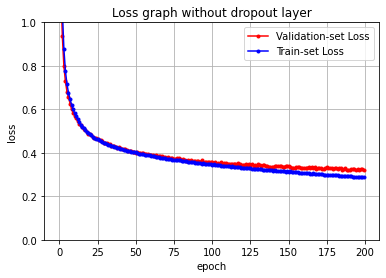

In [26]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

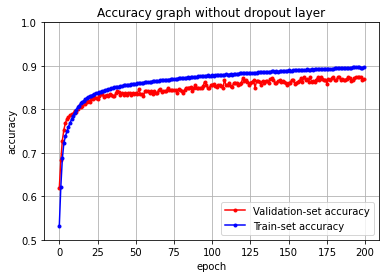

In [27]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 이번에는 dropout layer를 추가하여 실험해보자

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 7ms/step - loss: 2.2065 - accuracy: 0.4044 - val_loss: 1.6763 - val_accuracy: 0.5783
Epoch 2/200
117/117 [==============================] - 1s 5ms/step - loss: 1.5679 - accuracy: 0.5406 - val_loss: 1.2175 - val_accuracy: 0.6583
Epoch 3/200
117/117 [==============================] - 1s 5ms/step - loss: 1.2040 - accuracy: 0.6095 - val_loss: 0.9999 - val_accuracy: 0.7167
Epoch 4/200
117/117 [==============================] - 1s 5ms/step - loss: 1.0178 - accuracy: 0.6658 - val_loss: 0.8701 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 1s 5ms/step - loss: 0.9044 - accuracy: 0.6941 - val_loss: 0.7873 - val_accuracy: 0.7567
Epoch 6/200
117/117 [==============================] - 1s 5ms/step - loss: 0.8243 - accuracy: 0.7152 - val_loss: 0.7273 - val_accuracy: 0.7700
Epoch 7/200
117/117 [==============================] - 1s 5ms/step - loss: 0.7778 - accuracy: 0.7230 - val_loss: 0.6873 - val_accuracy: 0.7800

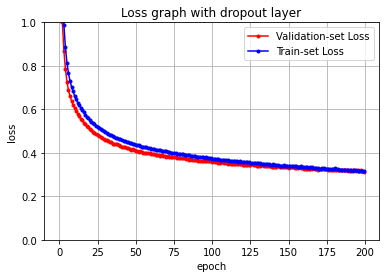

In [29]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

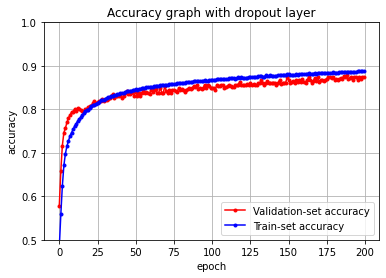

In [30]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- dropout layer 없이 학습했을 때보다 validation set과 train set의 accuracy가 거의 동일하게 나왔다!

# Batch Normalization

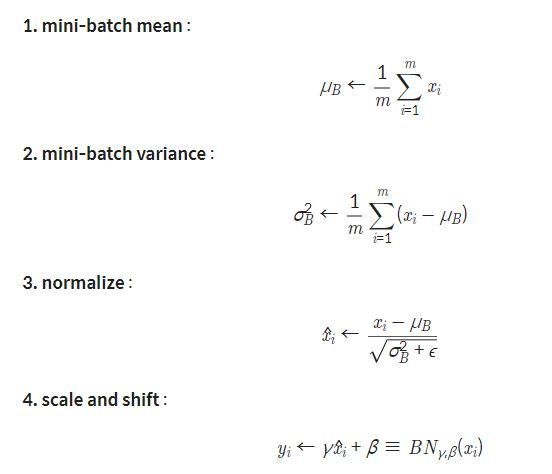

여기서 중요한 부분은 normalize 부분에서 분모에 epsilon ϵ가 추가된다는 점이다. 이 부분으로 인해 normalize 과정에서 gradient vanishing, gradient exploding을 막을 수 있다.

- 이번에도 fully connected layer와 batch normalization layer를 추가한 두 실험을 비교해보자. 정확도 비교와 속도의 차이에 주목하자

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [32]:
# train/valid를 7/3으로 나눈 후 dense layer를 쌓아서 트레이닝

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 22ms/step - loss: 1.7315 - accuracy: 0.4147 - val_loss: 0.7948 - val_accuracy: 0.7258
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.7317 - accuracy: 0.7473 - val_loss: 0.6324 - val_accuracy: 0.7869
Epoch 3/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6065 - accuracy: 0.7954 - val_loss: 0.5636 - val_accuracy: 0.8107
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5471 - accuracy: 0.8141 - val_loss: 0.5254 - val_accuracy: 0.8214
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5032 - accuracy: 0.8335 - val_loss: 0.4920 - val_accuracy: 0.8353
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4747 - accuracy: 0.8425 - val_loss: 0.4749 - val_accuracy: 0.8401
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4534 - accuracy: 0.8461 - val_loss: 0.4620 - val_accuracy: 0.8422
Epoch 8/20
21/21 [

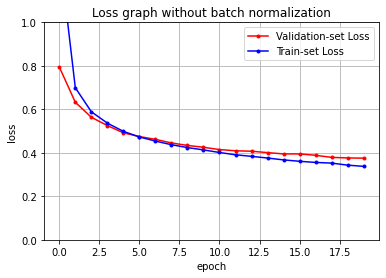

In [33]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

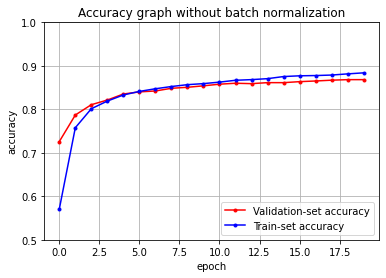

In [34]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- Batch normalization layer 추가 후 실습

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 22ms/step - loss: 1.3284 - accuracy: 0.5598 - val_loss: 1.0693 - val_accuracy: 0.6531
Epoch 2/20
21/21 [==============================] - 0s 10ms/step - loss: 0.5386 - accuracy: 0.8196 - val_loss: 0.8288 - val_accuracy: 0.7503
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4624 - accuracy: 0.8436 - val_loss: 0.7342 - val_accuracy: 0.7956
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4186 - accuracy: 0.8554 - val_loss: 0.6786 - val_accuracy: 0.8164
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3893 - accuracy: 0.8659 - val_loss: 0.6285 - val_accuracy: 0.8299
Epoch 6/20
21/21 [==============================] - 0s 10ms/step - loss: 0.3616 - accuracy: 0.8735 - val_loss: 0.5980 - val_accuracy: 0.8301
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - loss: 0.3451 - accuracy: 0.8801 - val_loss: 0.5500 - val_accuracy: 0.8517
Epoch 8/20
21/2

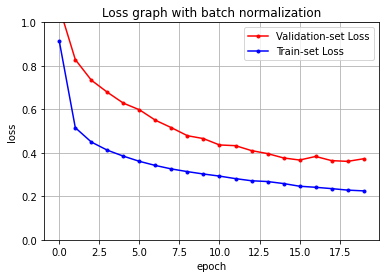

In [36]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

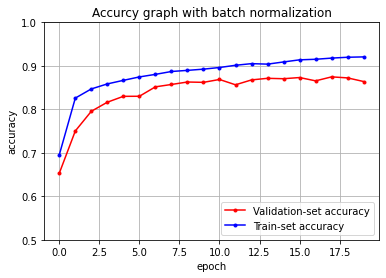

In [37]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있다. 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 epsilon ϵ 부분으로 인해 안정적인 학습이 가능해진다.